## Read data and basic data clean-up

In [1]:
%matplotlib inline

import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import os
import zipfile
import cv2
import tensorflow as tf
import time
import dateutil
import sklearn.metrics as sm

In [2]:
PATH='../input/appliances-energy-prediction/KAG_energydata_complete.csv'
data = pd.read_csv(PATH)
data.columns = [x.lower() for x in data.columns]
data.head(5)

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.3,13.275433,13.275433
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.2,18.606195,18.606195
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.1,28.642668,28.642668
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,5.0,45.410389,45.410389
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,17.000000,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.9,10.084097,10.084097


In [3]:
data.isnull().sum().sort_values(ascending=False)

date           0
t7             0
rv1            0
tdewpoint      0
visibility     0
windspeed      0
rh_out         0
press_mm_hg    0
t_out          0
rh_9           0
t9             0
rh_8           0
t8             0
rh_7           0
rh_6           0
appliances     0
t6             0
rh_5           0
t5             0
rh_4           0
t4             0
rh_3           0
t3             0
rh_2           0
t2             0
rh_1           0
t1             0
lights         0
rv2            0
dtype: int64

In [4]:
data.apply(lambda x: len(x.unique()))

date           19735
appliances        92
lights             8
t1               722
rh_1            2547
t2              1650
rh_2            3376
t3              1426
rh_3            2618
t4              1390
rh_4            2987
t5              2263
rh_5            7571
t6              4446
rh_6            9709
t7              1955
rh_7            5891
t8              2228
rh_8            6649
t9               924
rh_9            3388
t_out           1730
press_mm_hg     2189
rh_out           566
windspeed        189
visibility       413
tdewpoint       1409
rv1            19735
rv2            19735
dtype: int64

In [5]:
data.describe()

,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,rh_4,...,t9,rh_9,t_out,press_mm_hg,rh_out,windspeed,visibility,tdewpoint,rv1,rv2
count,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,...,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000,19735.000000
mean,97.694958,3.801875,21.686571,40.259739,20.341219,40.420420,22.267611,39.242500,20.855335,39.026904,...,19.485828,41.552401,7.411665,755.522602,79.750418,4.039752,38.330834,3.760707,24.988033,24.988033
std,102.524891,7.935988,1.606066,3.979299,2.192974,4.069813,2.006111,3.254576,2.042884,4.341321,...,2.014712,4.151497,5.317409,7.399441,14.901088,2.451221,11.794719,4.194648,14.496634,14.496634
min,10.000000,0.000000,16.790000,27.023333,16.100000,20.463333,17.200000,28.766667,15.100000,27.660000,...,14.890000,29.166667,-5.000000,729.300000,24.000000,0.000000,1.000000,-6.600000,0.005322,0.005322
25%,50.000000,0.000000,20.760000,37.333333,18.790000,37.900000,20.790000,36.900000,19.530000,35.530000,...,18.000000,38.500000,3.666667,750.933333,70.333333,2.000000,29.000000,0.900000,12.497889,12.497889
50%,60.000000,0.000000,21.600000,39.656667,20.000000,40.500000,22.100000,38.530000,20.666667,38.400000,...,19.390000,40.900000,6.916667,756.100000,83.666667,3.666667,40.000000,3.433333,24.897653,24.897653
75%,100.000000,0.000000,22.600000,43.066667,21.500000,43.260000,23.290000,41.760000,22.100000,42.156667,...,20.600000,44.338095,10.408333,760.933333,91.666667,5.500000,40.000000,6.566667,37.583769,37.583769
max,1080.000000,70.000000,26.260000,63.360000,29.856667,56.026667,29.236000,50.163333,26.200000,51.090000,...,24.500000,53.326667,26.100000,772.300000,100.000000,14.000000,66.000000,15.500000,49.996530,49.996530


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19735 entries, 0 to 19734
Data columns (total 29 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         19735 non-null  object 
 1   appliances   19735 non-null  int64  
 2   lights       19735 non-null  int64  
 3   t1           19735 non-null  float64
 4   rh_1         19735 non-null  float64
 5   t2           19735 non-null  float64
 6   rh_2         19735 non-null  float64
 7   t3           19735 non-null  float64
 8   rh_3         19735 non-null  float64
 9   t4           19735 non-null  float64
 10  rh_4         19735 non-null  float64
 11  t5           19735 non-null  float64
 12  rh_5         19735 non-null  float64
 13  t6           19735 non-null  float64
 14  rh_6         19735 non-null  float64
 15  t7           19735 non-null  float64
 16  rh_7         19735 non-null  float64
 17  t8           19735 non-null  float64
 18  rh_8         19735 non-null  float64
 19  t9  

----------------------------------------------------------------------------------------------------------------
### Inferences:
     1. There are 29 columns - 1 date time column, 2 Integer columns and 26 Float column
     2. Nearly 1 coulmn (Lights) is having less than 10 unique items, which can be considered as categorical column
     3. There are NULL values in any of the given columns
     4. Target, which is Appliances need to predicted

## Feature Engineering

Checking for Outliers and removing extreme 1% of the data.

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='appliances', ylabel='Density'>

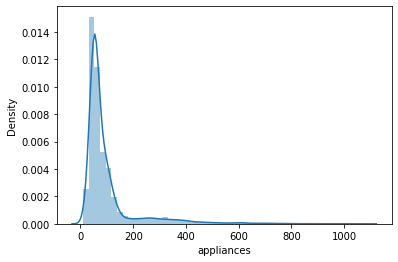

In [7]:
sns.distplot(data["appliances"])

/opt/conda/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


<AxesSubplot:xlabel='appliances'>

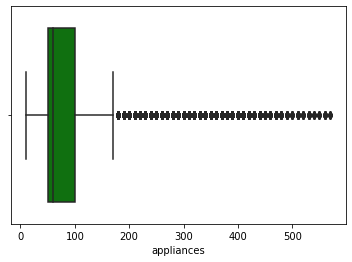

In [8]:
data = data[data['appliances'].between(data['appliances'].quantile(.0), data['appliances'].quantile(.99))]
sns.boxplot(data["appliances"],color="green")

### Injesting new features to the dataset

In [9]:
data["exact_date"]=data['date'].str.split(' ').str[0]

data["hours"]=(data['date'].str.split(':').str[0].str.split(" ").str[1]).astype(str).astype(int)
data["seconds"]=((data['date'].str.split(':').str[1])).astype(str).astype(int).mul(60)

data["week"]=(data['date'].str.split(' ').str[0])
data["week"]=(data['week'].apply(dateutil.parser.parse, dayfirst=True))
data["weekday"]=(data['week'].dt.dayofweek).astype(str).astype(int)
data["week"]=(data['week'].dt.day_name())

data['log_appliances'] = np.log(data.appliances)
data['hour*lights'] = data.hours * data.lights
data['hour_avg'] = list(map(dict(data.groupby('hours')["appliances"].mean()).get, data.hours))

data.head(5)

,date,appliances,lights,t1,rh_1,t2,rh_2,t3,rh_3,t4,...,rv1,rv2,exact_date,hours,seconds,week,weekday,log_appliances,hour*lights,hour_avg
0,2016-01-11 17:00:00,60,30,19.89,47.596667,19.2,44.790000,19.79,44.730000,19.000000,...,13.275433,13.275433,2016-01-11,17,0,Tuesday,1,4.094345,510,141.919699
1,2016-01-11 17:10:00,60,30,19.89,46.693333,19.2,44.722500,19.79,44.790000,19.000000,...,18.606195,18.606195,2016-01-11,17,600,Tuesday,1,4.094345,510,141.919699
2,2016-01-11 17:20:00,50,30,19.89,46.300000,19.2,44.626667,19.79,44.933333,18.926667,...,28.642668,28.642668,2016-01-11,17,1200,Tuesday,1,3.912023,510,141.919699
3,2016-01-11 17:30:00,50,40,19.89,46.066667,19.2,44.590000,19.79,45.000000,18.890000,...,45.410389,45.410389,2016-01-11,17,1800,Tuesday,1,3.912023,680,141.919699
4,2016-01-11 17:40:00,60,40,19.89,46.333333,19.2,44.530000,19.79,45.000000,18.890000,...,10.084097,10.084097,2016-01-11,17,2400,Tuesday,1,4.094345,680,141.919699


## Perform analysis & model development 

### Day wise Electricity consumption

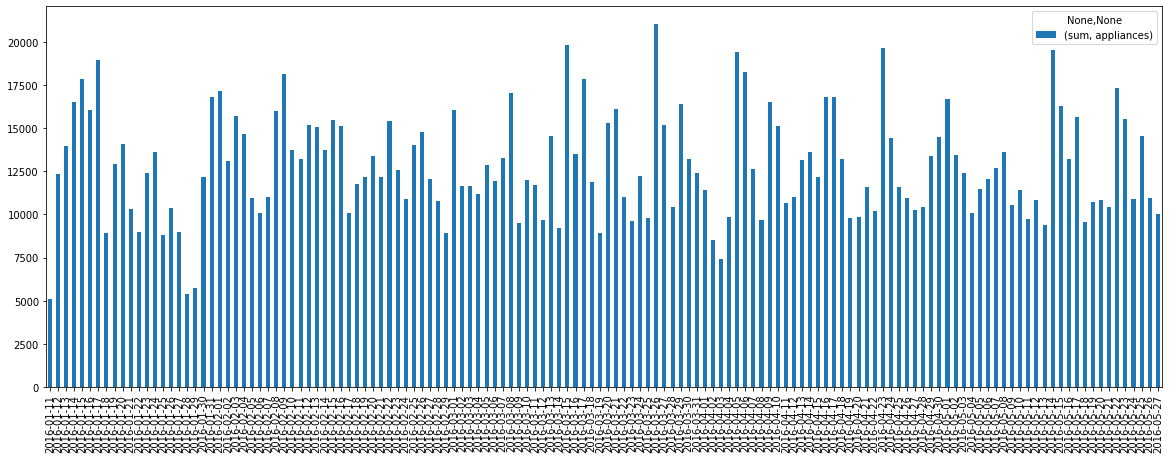

In [10]:
dates=data["exact_date"].unique()
arranged_day = pd.Categorical(data["exact_date"], categories=dates,ordered=True)
date_series = pd.Series(arranged_day)
table = pd.pivot_table(data,values="appliances",index=date_series, aggfunc=[np.sum],fill_value=0)
table.plot(kind="bar",figsize=(20, 7))
plt.show()

### Weekend vs Weekday?

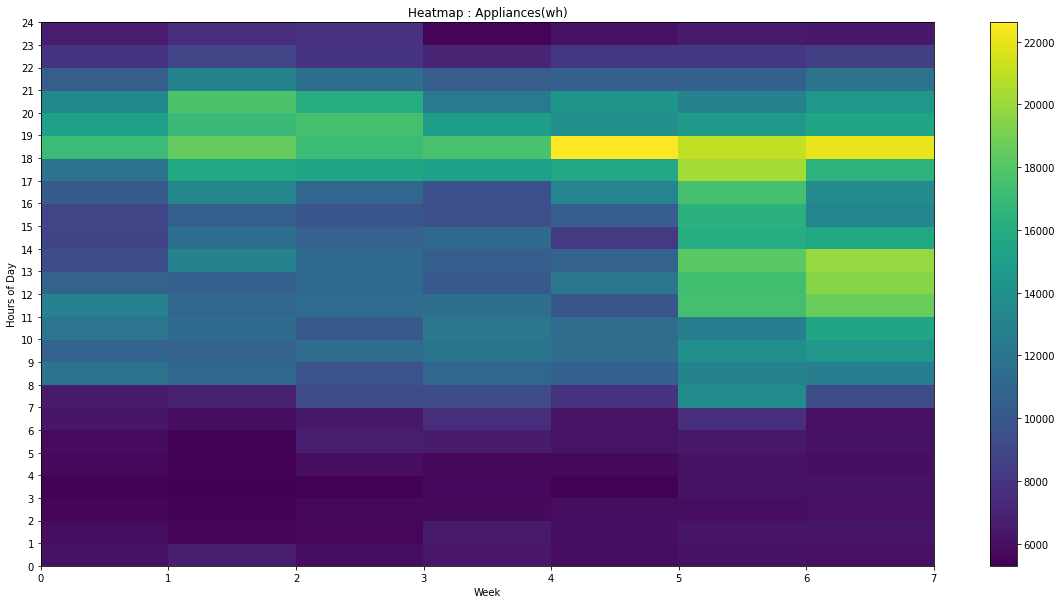

In [11]:
days=["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
arranged_day = pd.Categorical(data["week"], categories=days,ordered=True)
day_series = pd.Series(arranged_day)
table = pd.pivot_table(data,index=["hours"],
               values="appliances",columns=day_series,
               aggfunc=[np.sum],fill_value=0)

fig, ax = plt.subplots(figsize=(20, 10))
ax.set_title('Heatmap : Appliances(wh)')

heatmap = ax.pcolor(table)

ax.set_xlabel("Week Days")
ax.set_ylabel("Hours")

plt.colorbar(heatmap)
ax.set_yticks(range(len(table.index)+1))
ax.set_xticks(range(len(table.columns)+1))

plt.xlabel("Week")
plt.ylabel("Hours of Day")
plt.show()

<AxesSubplot:>

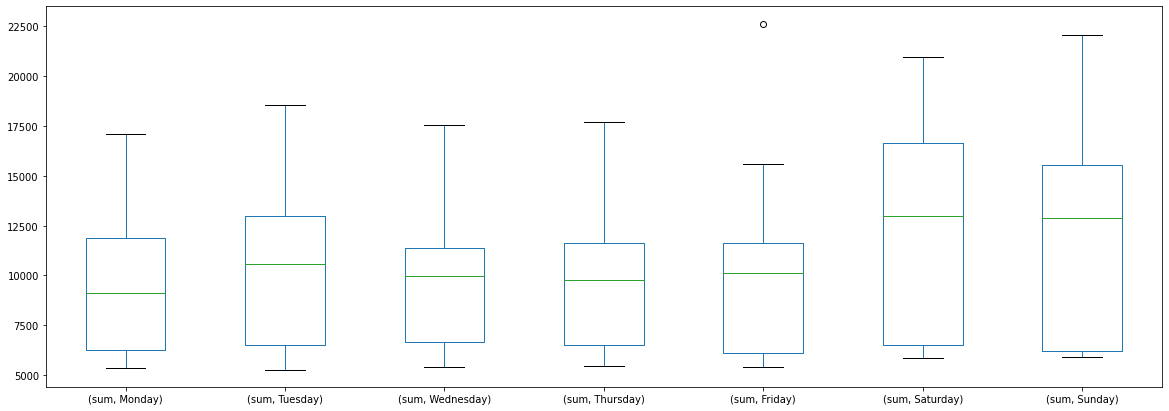

In [12]:
table.plot.box(figsize=(20, 7))

Weekends (Saturdays and Sundays) are observed to have high consumption of Electricity. (> 25% than Weekdays).

### Hour of the Day?

In [13]:
# Data sets in 30 minitues and 1 hour basis
data['date'] = pd.to_datetime(data['date'])
data = data.set_index('date')
df_hour = data.resample('1H').mean()
df_30min =data.resample('30min').mean()

In [14]:
# Qualitative predictors 
'''We assume that we have low(high) energy load when the appliances consumption is lower(higher) 
   than a given point of the hourly average counsumption. This point is dependent of data time frequency 
   and the numbers below are set after several tryouts based on appliances' consumption standard deviation.
'''

data['low_consum'] = (data.appliances+25<(data.hour_avg))*1
data['high_consum'] = (data.appliances+100>(data.hour_avg))*1

df_hour['low_consum'] = (df_hour.appliances+25<(df_hour.hour_avg))*1
df_hour['high_consum'] = (df_hour.appliances+25>(df_hour.hour_avg))*1

df_30min['low_consum'] = (df_30min.appliances+25<(df_30min.hour_avg))*1
df_30min['high_consum'] = (df_30min.appliances+35>(df_30min.hour_avg))*1

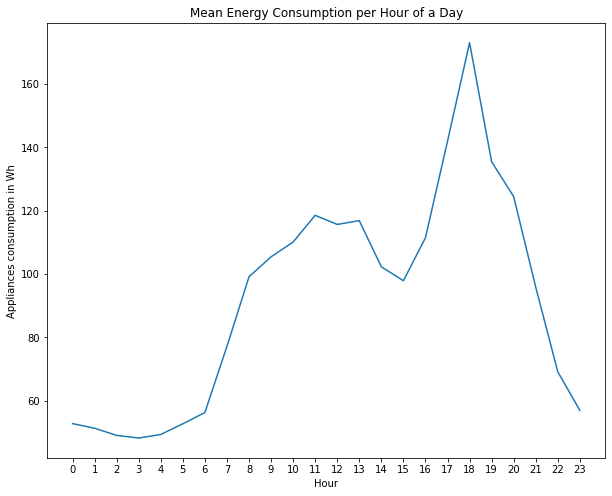

In [15]:
# Plot of Mean Energy Consumption per Hour of a Day

data.groupby('hours')['appliances'].mean().plot(figsize=(10,8))
plt.xlabel('Hour')
plt.ylabel('Appliances consumption in Wh')
ticks = list(range(0, 24, 1))
plt.title('Mean Energy Consumption per Hour of a Day')

plt.xticks(ticks);

High Electricity consumption of >140Wh is observed during evening hours 16:00 to 20:00. At night hours from 23:00-6:00 the power load is below 50Wh, meaning that most appliances are off or standby. Between 9:00-13:00 the power load is >100Wh and after launch reduces again to <100Wh. At afternoon, the energy consumption ranges from 130-185Wh as family members are at home and many devices are on. 

### Histogram of Appliance's consumption

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Appliances log(wH)')

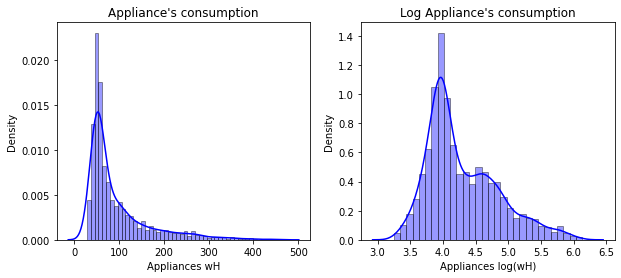

In [16]:
f, axes = plt.subplots(1, 2,figsize=(10,4))

sns.distplot(df_hour.appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[0])
axes[0].set_title("Appliance's consumption")
axes[0].set_xlabel('Appliances wH')

sns.distplot(df_hour.log_appliances, hist=True, color = 'blue',hist_kws={'edgecolor':'black'},ax=axes[1])
axes[1].set_title("Log Appliance's consumption")
axes[1].set_xlabel('Appliances log(wH)')

The distribution of power load is not normal as we have left asymetry, for this reason we shall use log(power load) which has closer to normal distribution for further analysis.

### Pearson Correlation among the variables

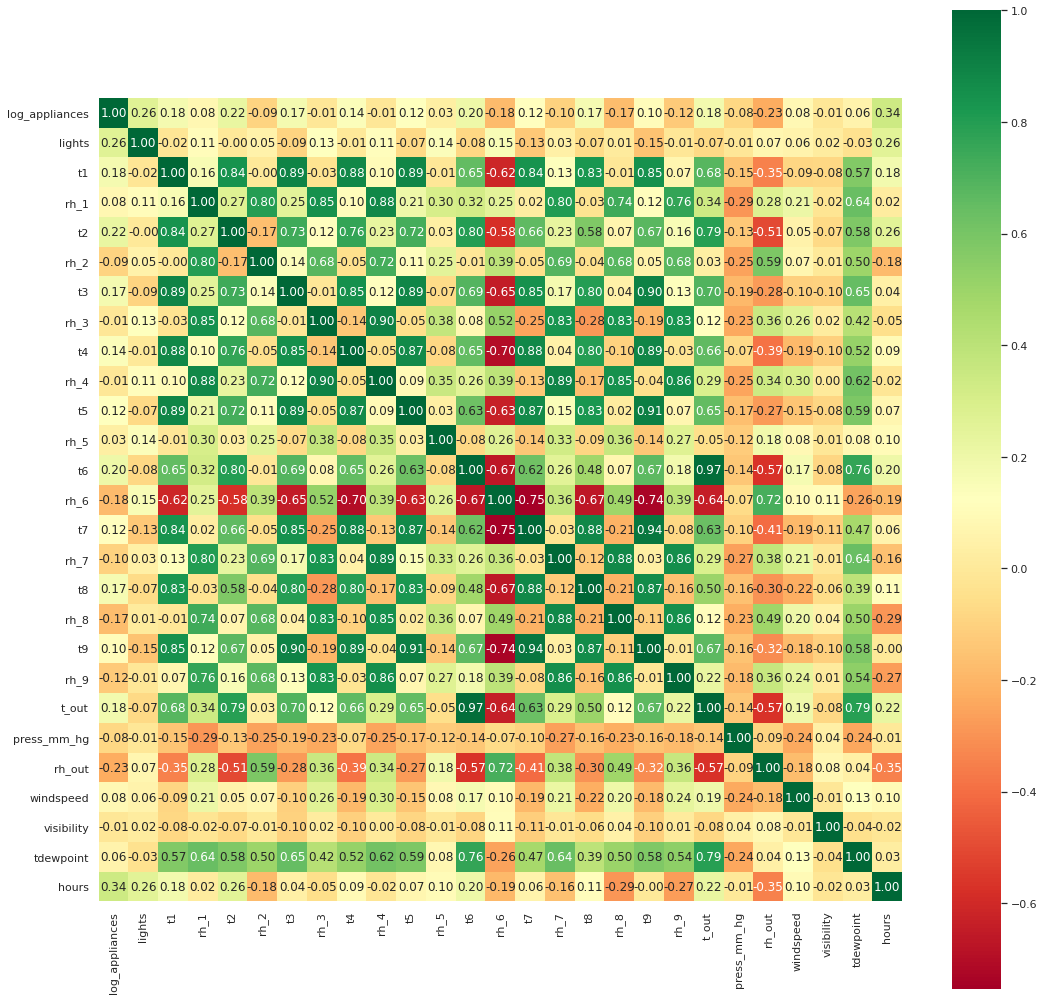

In [17]:

col = ['log_appliances', 'lights', 't1', 'rh_1', 't2', 'rh_2', 't3', 'rh_3', 't4',
       'rh_4', 't5', 'rh_5', 't6', 'rh_6', 't7', 'rh_7', 't8', 'rh_8', 't9',
       'rh_9', 't_out', 'press_mm_hg', 'rh_out', 'windspeed', 'visibility',
       'tdewpoint','hours']
corr = data[col].corr()
plt.figure(figsize = (18,18))
sns.set(font_scale=1)
sns.heatmap(corr, cbar = True, annot=True, square = True,cmap="RdYlGn", fmt = '.2f', xticklabels=col, yticklabels=col)
plt.show();

The Energy consumption is highly correlated with:
    1. Hours : 0.34
    2. Lights : 0.26
    3. T2 : 0.22
    4. T6 : 0.26
    
Also all temperature values inside house are highly correlated with each other (> 0.8)

### Linear dependencey evaluation

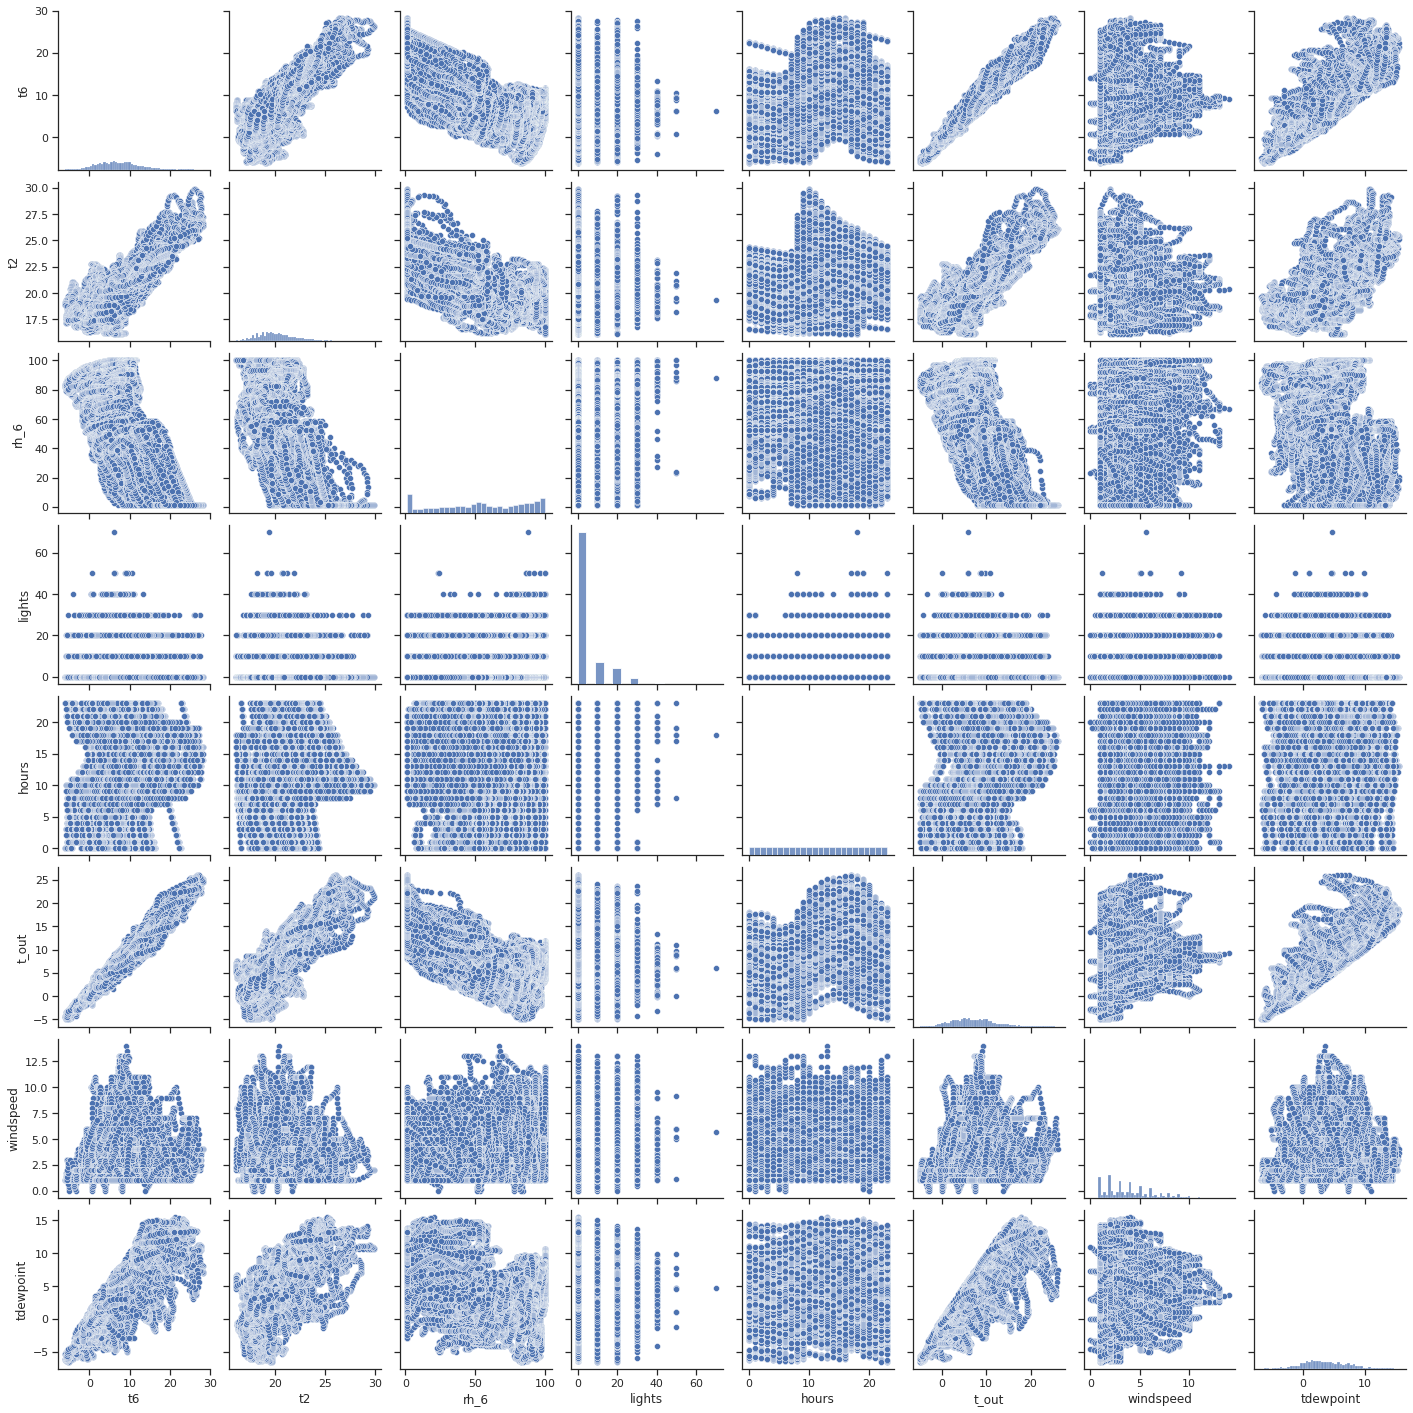

In [18]:
col = ['t6','t2', 'rh_6','lights','hours','t_out','windspeed','tdewpoint']
sns.set(style="ticks", color_codes=True)
sns.pairplot(data[col])
plt.show();

Inside temperatures, outside temperatures and tdewpoint have linear relationship. These features will best suite for Linear regression modelling.

### Transforming categorical variables 

In [19]:
for cat_feature in ['weekday', 'hours']:
    df_hour = pd.concat([df_hour, pd.get_dummies(df_hour[cat_feature])], axis=1)
    df_30min = pd.concat([df_30min, pd.get_dummies(df_30min[cat_feature])], axis=1)
    df = pd.concat([data, pd.get_dummies(data[cat_feature])], axis=1)

Generated 3 data sets with time interval 10 minutes, 30 minutes, 1 hour respectively. Using the 1 hour data set for further analysis as it having less noise.

## Modelling

Trying out 6 Regression models:
    1. LinearRegression
    2. SVR
    3. RandomForestRegressor
    4. LGBMRegressor
    5. XGBRegressor
    6. catboost

In [20]:
feature_set = ['low_consum','high_consum','hours','t6','rh_6','lights','hour*lights',
               'tdewpoint','visibility','press_mm_hg','windspeed']

In [21]:
# to avoid warnings from standardscaler
df_hour.lights = df_hour.lights.astype(float)
df_hour.log_appliances = df_hour.log_appliances.astype(float)
df_hour.hour = df_hour.hours.astype(float)
df_hour.low_consum = df_hour.low_consum.astype(float)
df_hour.high_consum = df_hour.high_consum.astype(float)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:4: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  after removing the cwd from sys.path.


In [22]:
len(list(df_hour.columns))

67

In [23]:
# Creation of train/test sets
test_size=.2
test_index = int(len(df_hour.dropna())*(1-test_size))

X_train, X_test = df_hour[feature_set].iloc[:test_index,], df_hour[feature_set].iloc[test_index:,]
y_train = df_hour.log_appliances.iloc[:test_index,]

y_test =  df_hour.log_appliances.iloc[test_index:,]

In [24]:
X_train

,low_consum,high_consum,hours,t6,rh_6,lights,hour*lights,tdewpoint,visibility,press_mm_hg,windspeed
date,,,,,,,,,,,
2016-01-11 17:00:00,1.0,0.0,17.0,6.586667,84.260000,35.000000,595.0,5.050000,53.416667,733.750000,6.166667
2016-01-11 18:00:00,1.0,0.0,18.0,6.191333,87.046667,50.000000,900.0,4.666667,40.000000,734.233333,5.333333
2016-01-11 19:00:00,0.0,1.0,19.0,5.857361,88.131389,25.000000,475.0,4.391667,40.000000,734.791667,6.000000
2016-01-11 20:00:00,0.0,1.0,20.0,5.469444,86.933889,35.000000,700.0,4.016667,40.000000,735.283333,6.000000
2016-01-11 21:00:00,0.0,1.0,21.0,5.578889,86.129444,23.333333,490.0,3.816667,40.000000,735.566667,6.000000
...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30 04:00:00,0.0,1.0,4.0,5.127778,52.397778,0.000000,0.0,4.475000,33.583333,757.083333,1.583333
2016-04-30 05:00:00,0.0,1.0,5.0,4.944444,52.863333,0.000000,0.0,4.258333,40.000000,757.241667,1.000000
2016-04-30 06:00:00,0.0,1.0,6.0,5.423889,53.928611,0.000000,0.0,4.241667,40.000000,757.425000,1.000000


In [25]:
y_test

date
2016-04-30 09:00:00    5.425027
2016-04-30 10:00:00    5.793505
2016-04-30 11:00:00    4.898321
2016-04-30 12:00:00    5.353343
2016-04-30 13:00:00    5.036060
                         ...   
2016-05-27 14:00:00    4.497876
2016-05-27 15:00:00    4.326760
2016-05-27 16:00:00    4.847371
2016-05-27 17:00:00    4.990658
2016-05-27 18:00:00    6.063785
Freq: H, Name: log_appliances, Length: 658, dtype: float64

In [26]:
X_test

,low_consum,high_consum,hours,t6,rh_6,lights,hour*lights,tdewpoint,visibility,press_mm_hg,windspeed
date,,,,,,,,,,,
2016-04-30 09:00:00,0.0,1.0,9.0,11.005556,30.475556,0.000000,0.000000,4.358333,40.000000,758.625000,1.000000
2016-04-30 10:00:00,0.0,1.0,10.0,11.630000,17.248333,2.500000,25.000000,4.358333,40.000000,758.975000,1.000000
2016-04-30 11:00:00,0.0,1.0,11.0,13.040000,12.884444,1.666667,18.333333,4.358333,34.583333,759.141667,1.000000
2016-04-30 12:00:00,0.0,1.0,12.0,13.217000,2.258333,0.000000,0.000000,4.100000,32.200000,759.280000,1.000000
2016-04-30 13:00:00,0.0,1.0,13.0,13.002222,1.032222,1.666667,21.666667,3.758333,32.500000,759.400000,1.833333
...,...,...,...,...,...,...,...,...,...,...,...
2016-05-27 14:00:00,0.0,1.0,14.0,25.567222,1.000000,1.666667,23.333333,13.475000,21.583333,755.800000,2.000000
2016-05-27 15:00:00,0.0,1.0,15.0,26.279444,1.000000,0.000000,0.000000,13.258333,21.833333,755.675000,2.000000
2016-05-27 16:00:00,0.0,1.0,16.0,26.138889,1.000000,0.000000,0.000000,13.283333,22.583333,755.375000,2.416667


In [27]:
y_train

date
2016-01-11 17:00:00    4.003184
2016-01-11 18:00:00    4.393922
2016-01-11 19:00:00    4.923982
2016-01-11 20:00:00    4.793191
2016-01-11 21:00:00    4.636940
                         ...   
2016-04-30 04:00:00    3.935606
2016-04-30 05:00:00    4.003184
2016-04-30 06:00:00    3.630176
2016-04-30 07:00:00    4.099078
2016-04-30 08:00:00    5.474135
Freq: H, Name: log_appliances, Length: 2632, dtype: float64

In [28]:
from sklearn.preprocessing import StandardScaler

# Normalizing of X matrices for each model to mean = 0 and standard deviation = 1

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [29]:
X_train[0]

array([ 1.56944509, -1.56944509,  0.79393729,  0.09483962,  0.77151143,
        4.22169732,  4.14901869,  0.65935286,  1.25052448, -2.78453515,
        0.74556566])

In [30]:
from sklearn import linear_model

lin_model = linear_model.LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

In [31]:
from sklearn import svm

svr_model = svm.SVR(gamma='scale')
svr_model.fit(X_train,y_train)

SVR()

In [32]:
from sklearn.ensemble import RandomForestRegressor

rf_model = RandomForestRegressor(n_estimators=100,random_state=1)            
rf_model.fit(X_train, y_train)

RandomForestRegressor(random_state=1)

In [33]:
import xgboost as xgb
from xgboost import plot_importance
import lightgbm as lgb
from catboost import CatBoostRegressor as cbr

model_lgb = lgb.LGBMRegressor(num_leaves=41, n_estimators=200)
model_lgb.fit(X_train, y_train)

LGBMRegressor(n_estimators=200, num_leaves=41)

In [34]:
model_xgb = xgb.XGBRegressor(objective='reg:squarederror')
model_xgb.fit(X_train, y_train)

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
             tree_method='exact', validate_parameters=1, verbosity=None)

In [35]:
model_cbr = cbr(random_seed=242, verbose=0, early_stopping_rounds=10)
model_cbr.fit(X_train, y_train)

### Model Evaluation, Cross-validation & Selection

In [36]:
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, cross_val_predict
from sklearn import metrics

# Function to evaluate the models
def evaluate(model, test_features, test_labels):
    predictions = model.predict(test_features)
    errors = abs(predictions - test_labels)
    mape = 100 * np.mean(errors / test_labels)
    r_score = 100*r2_score(test_labels,predictions)
    accuracy = 100 - mape
    print(model,'\n')
    print('Average Error       : {:0.4f} degrees'.format(np.mean(errors)))
    print('Variance score R^2  : {:0.2f}%' .format(r_score))
    print('Accuracy            : {:0.2f}%\n'.format(accuracy))

In [37]:
evaluate(lin_model, X_test, y_test)
evaluate(svr_model, X_test, y_test)
evaluate(rf_model, X_test, y_test)
evaluate(model_lgb, X_test, y_test)
evaluate(model_xgb, X_test, y_test)
evaluate(model_cbr, X_test, y_test)

LinearRegression() 

Average Error       : 0.3065 degrees
Variance score R^2  : 23.88%
Accuracy            : 93.00%

SVR() 

Average Error       : 0.2764 degrees
Variance score R^2  : 23.67%
Accuracy            : 94.02%

RandomForestRegressor(random_state=1) 

Average Error       : 0.1932 degrees
Variance score R^2  : 67.16%
Accuracy            : 95.71%

LGBMRegressor(n_estimators=200, num_leaves=41) 

Average Error       : 0.2009 degrees
Variance score R^2  : 65.26%
Accuracy            : 95.54%

XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
             importance_type='gain', interaction_constraints='',
             learning_rate=0.300000012, max_delta_step=0, max_depth=6,
             min_child_weight=1, missing=nan, monotone_constraints='()',
             n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
             reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=

In [38]:
#instead of KFold I use TimeSeriesSplit (10 splits) due to time series data
cv = TimeSeriesSplit(n_splits = 10)

print('Linear Model:')
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(lin_model, X_train, y_train, cv=cv,scoring='r2')
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('SVR Model:')
scores = cross_val_score(svr_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(svr_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('Random Forest Model:')
scores = cross_val_score(rf_model, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(rf_model, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('LGBMRegressor Model:')
scores = cross_val_score(model_lgb, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_lgb, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('XGBRegressor Model:')
scores = cross_val_score(model_xgb, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_xgb, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

print('CatBoostRegressor Model:')
scores = cross_val_score(model_cbr, X_train, y_train, cv=cv,scoring='neg_mean_absolute_error')
print("Accuracy: %0.2f (+/- %0.2f) degrees" % (100+scores.mean(), scores.std() * 2))
scores = cross_val_score(model_cbr, X_train, y_train, cv=cv)
print("R^2: %0.2f (+/- %0.2f) degrees" % (scores.mean(), scores.std() * 2))

Linear Model:
Accuracy: 99.65 (+/- 0.16) degrees
R^2: 0.26 (+/- 0.30) degrees
SVR Model:
Accuracy: 99.71 (+/- 0.09) degrees
R^2: 0.48 (+/- 0.15) degrees
Random Forest Model:
Accuracy: 99.73 (+/- 0.22) degrees
R^2: 0.54 (+/- 0.54) degrees
LGBMRegressor Model:
Accuracy: 99.75 (+/- 0.09) degrees
R^2: 0.62 (+/- 0.17) degrees
XGBRegressor Model:
Accuracy: 99.73 (+/- 0.09) degrees
R^2: 0.58 (+/- 0.17) degrees
CatBoostRegressor Model:
Accuracy: 99.75 (+/- 0.10) degrees
R^2: 0.64 (+/- 0.14) degrees


Random Forest Model is having the best Accuracy and CatBoost is having the highest R^2.

## Model performance on test data

In [39]:
y1_pred = lin_model.predict(X_test)
y2_pred = svr_model.predict(X_test)
y3_pred = rf_model.predict(X_test)
y4_pred = model_lgb.predict(X_test)
y5_pred = model_xgb.predict(X_test)
y6_pred = model_cbr.predict(X_test)

Text(0.5, 0.01, 'Fitted Values')

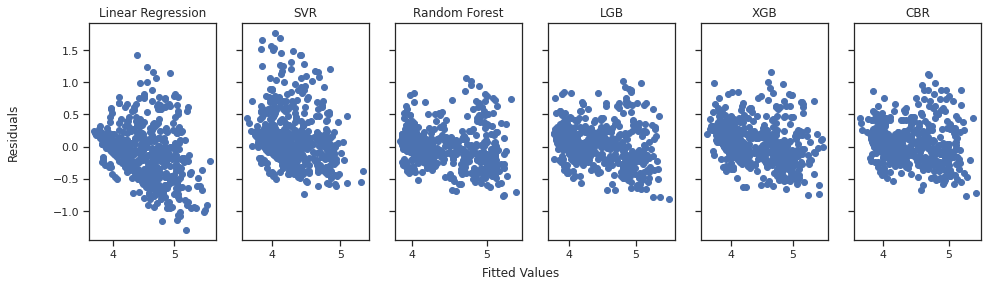

In [40]:
fig, axs = plt.subplots(1, 6, figsize=(16,4), sharey=True)
axs[0].scatter(y1_pred,y_test-y1_pred)
axs[0].set_title('Linear Regression')
axs[1].scatter(y2_pred,y_test-y2_pred)
axs[1].set_title('SVR')
axs[2].scatter(y3_pred,y_test-y3_pred)
axs[2].set_title('Random Forest')
axs[3].scatter(y4_pred,y_test-y4_pred)
axs[3].set_title('LGB')
axs[4].scatter(y5_pred,y_test-y5_pred)
axs[4].set_title('XGB')
axs[5].scatter(y6_pred,y_test-y6_pred)
axs[5].set_title('CBR')
fig.text(0.06, 0.5, 'Residuals', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'Fitted Values', ha='center', va='center')

RF, LGB, XGB, CBR models appears to has mean random residuals close to 0 and constant standard deviation.

Text(0.5, 0.01, 'True Values')

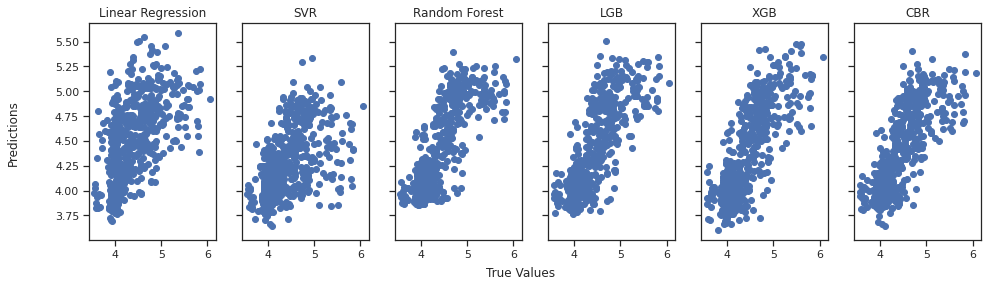

In [41]:
fig, axs = plt.subplots(1, 6, figsize=(16,4), sharey=True)
axs[0].scatter(y_test,y1_pred)
axs[0].set_title('Linear Regression')
axs[1].scatter(y_test,y2_pred)
axs[1].set_title('SVR')
axs[2].scatter(y_test, y3_pred)
axs[2].set_title('Random Forest')
axs[3].scatter(y_test, y4_pred)
axs[3].set_title('LGB')
axs[4].scatter(y_test, y5_pred)
axs[4].set_title('XGB')
axs[5].scatter(y_test, y6_pred)
axs[5].set_title('CBR')
fig.text(0.06, 0.5, 'Predictions', ha='center', va='center', rotation='vertical')
fig.text(0.5, 0.01,'True Values', ha='center', va='center')

XGB model appears to be the one which predicts high and low values of energy consumption.

### Prediction of each model vs Test data

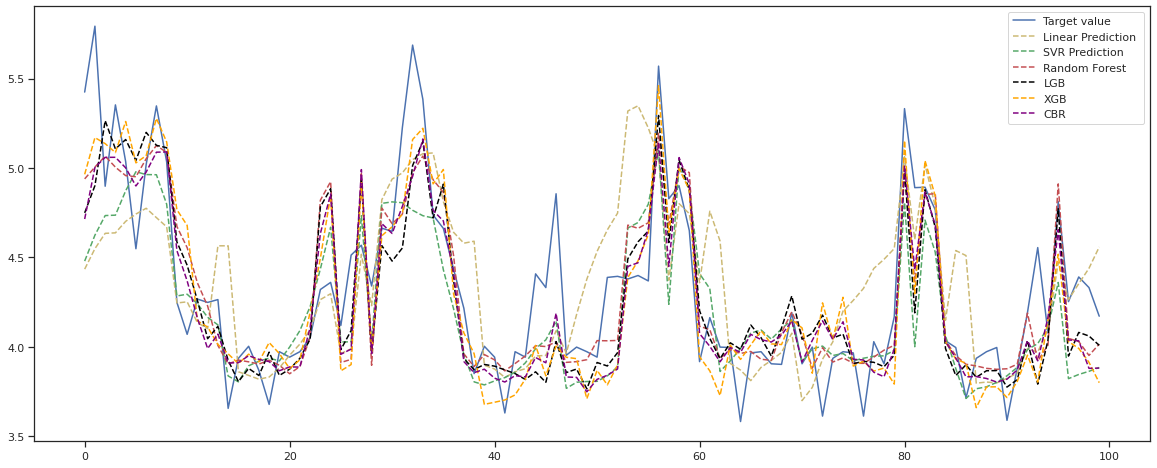

In [42]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
plt.plot(y1_pred[:100],label='Linear Prediction ', linestyle='--', color='y')
plt.plot(y2_pred[:100],label='SVR Prediction ', linestyle='--', color='g')
plt.plot(y3_pred[:100],label='Random Forest', linestyle='--', color='r')
plt.plot(y4_pred[:100],label='LGB', linestyle='--', color='black')
plt.plot(y5_pred[:100],label='XGB', linestyle='--', color='orange')
plt.plot(y6_pred[:100],label='CBR', linestyle='--', color='purple')

plt.legend(loc=1)

XBG is predicitng highs and lows better than other models. Overall Random Forest appears to closely fit with the test data.

### Parameter Tuning

In [43]:
from sklearn.model_selection import GridSearchCV, KFold

parameters = {
    'max_depth': [800,1000,1500],
    'min_samples_leaf': [5,8,10],
    'min_samples_split': [5,10,15],
    'n_estimators': [40,60,100],
    'random_state':[1]    
}

cv =cv
grid_model = GridSearchCV(RandomForestRegressor(), parameters, cv=cv)

grid_model = grid_model.fit(X_train, y_train)
print(grid_model.best_estimator_)
print(grid_model.best_params_)

RandomForestRegressor(max_depth=800, min_samples_leaf=10, min_samples_split=5,
                      n_estimators=60, random_state=1)
{'max_depth': 800, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 60, 'random_state': 1}


In [44]:
best_rf_model = grid_model.best_estimator_
grid_accuracy = evaluate(grid_model, X_test, y_test)
y_best_pred = best_rf_model.predict(X_test)

GridSearchCV(cv=TimeSeriesSplit(gap=0, max_train_size=None, n_splits=10, test_size=None),
             estimator=RandomForestRegressor(),
             param_grid={'max_depth': [800, 1000, 1500],
                         'min_samples_leaf': [5, 8, 10],
                         'min_samples_split': [5, 10, 15],
                         'n_estimators': [40, 60, 100], 'random_state': [1]}) 

Average Error       : 0.1909 degrees
Variance score R^2  : 68.26%
Accuracy            : 95.77%



#### The Variance score of the model impoved from 65% to 68.26%.

### Final predictions on test set based on best RF model

In [45]:
# Calculate Confidence interval 95% for the predictions
sum_errs = np.sum((y_test - y_best_pred)**2)
stdev = np.sqrt(1/(len(df_hour)-2) * sum_errs)

interval = 1.96 * stdev #95% CI
lower, upper = y_best_pred - interval, y_best_pred + interval

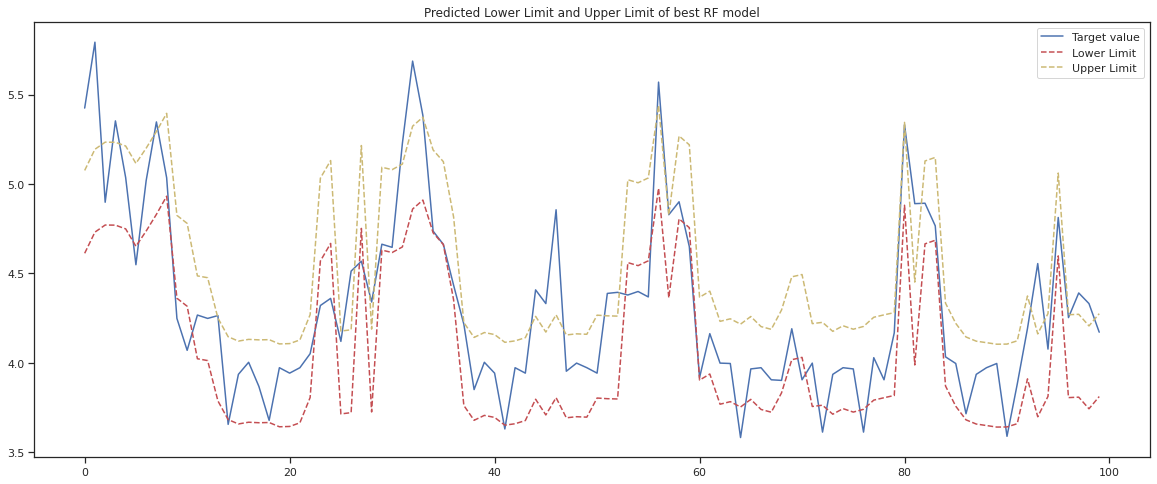

In [46]:
fig = plt.figure(figsize=(20,8))
plt.plot(y_test[:100].values,label='Target value',color='b')
#plt.plot(y_pred,label='Best Tree Prediction ', linestyle='-', color='b')
plt.plot(lower[:100],label='Lower Limit ', linestyle='--', color='r')
plt.plot(upper[:100],label='Upper Limit ', linestyle='--', color='y')
plt.title('Predicted Lower Limit and Upper Limit of best RF model')

plt.legend(loc=1)

### Factors influencing energy consumption

In [47]:
factor_list = feature_set
factors = np.array(X_test)

importances = list(rf_model.feature_importances_)

factor_importances = [(factor, round(importance, 2)) 
    for factor, importance in zip(factor_list, importances)]

factor_importances = sorted(factor_importances, key = lambda X_test: X_test[1], reverse = True)
 
[print('Variable: {:20} Importance: {}'.format(*pair)) for pair in factor_importances];

Variable: hours                Importance: 0.46
Variable: high_consum          Importance: 0.21
Variable: rh_6                 Importance: 0.06
Variable: low_consum           Importance: 0.04
Variable: t6                   Importance: 0.04
Variable: hour*lights          Importance: 0.04
Variable: tdewpoint            Importance: 0.04
Variable: press_mm_hg          Importance: 0.04
Variable: visibility           Importance: 0.03
Variable: windspeed            Importance: 0.03
Variable: lights               Importance: 0.01


Text(0.5, 1.0, 'Factors influencing energy consumption')

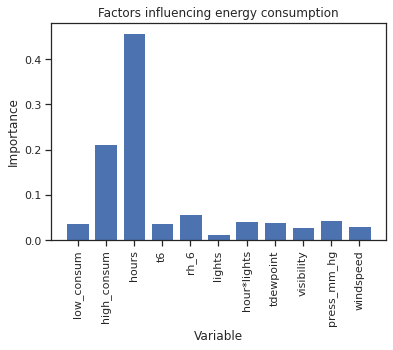

In [48]:
import matplotlib.pyplot as plt
%matplotlib inline

x_values = list(range(len(importances)))
plt.bar(x_values, importances, orientation = 'vertical')
plt.xticks(x_values, factor_list, rotation='vertical')
plt.ylabel('Importance'); plt.xlabel('Variable')
plt.title('Factors influencing energy consumption')


In [49]:
import pickle

# Assuming your model is named 'model'
with open('model_filename.pkl', 'wb') as f:
    pickle.dump(rf_model, f)


In [53]:
X_train[3]

array([-0.63716788,  0.63716788,  1.2267548 , -0.14464399,  0.8683768 ,
        4.22169732,  4.97167416,  0.36553549,  0.11272735, -2.58735002,
        0.67983176])

In [61]:
y_train[10]

3.4842645656233944

In [60]:
import joblib

# Load the model
model = joblib.load('model_filename.pkl')

# Assuming X_train[0] is the data point you want to make a prediction for
data_point = X_train[10]

# Reshape the data point if necessary (depends on the shape expected by the model)
data_point = data_point.reshape(1, -1)

# Make a prediction
prediction = model.predict(data_point)

print("Predicted value:", prediction)


Predicted value: [3.61161212]


In [62]:
test=df_hour[feature_set].iloc[:test_index,]

In [63]:
test

,low_consum,high_consum,hours,t6,rh_6,lights,hour*lights,tdewpoint,visibility,press_mm_hg,windspeed
date,,,,,,,,,,,
2016-01-11 17:00:00,1.0,0.0,17.0,6.586667,84.260000,35.000000,595.0,5.050000,53.416667,733.750000,6.166667
2016-01-11 18:00:00,1.0,0.0,18.0,6.191333,87.046667,50.000000,900.0,4.666667,40.000000,734.233333,5.333333
2016-01-11 19:00:00,0.0,1.0,19.0,5.857361,88.131389,25.000000,475.0,4.391667,40.000000,734.791667,6.000000
2016-01-11 20:00:00,0.0,1.0,20.0,5.469444,86.933889,35.000000,700.0,4.016667,40.000000,735.283333,6.000000
2016-01-11 21:00:00,0.0,1.0,21.0,5.578889,86.129444,23.333333,490.0,3.816667,40.000000,735.566667,6.000000
...,...,...,...,...,...,...,...,...,...,...,...
2016-04-30 04:00:00,0.0,1.0,4.0,5.127778,52.397778,0.000000,0.0,4.475000,33.583333,757.083333,1.583333
2016-04-30 05:00:00,0.0,1.0,5.0,4.944444,52.863333,0.000000,0.0,4.258333,40.000000,757.241667,1.000000
2016-04-30 06:00:00,0.0,1.0,6.0,5.423889,53.928611,0.000000,0.0,4.241667,40.000000,757.425000,1.000000


In [65]:
list(test.iloc[1,:])

[1.0,
 0.0,
 18.0,
 6.191333333333333,
 87.04666666666667,
 50.0,
 900.0,
 4.666666666666666,
 40.0,
 734.2333333333333,
 5.333333333333334]

In [66]:
# # Save the scaler object to a file using pickle
# with open('scaler.pkl', 'wb') as file:
#     pickle.dump(scaler, file)

# Later, you can load the scaler object from the file and use it to transform new data
# Load the scaler object from the file
with open('/kaggle/working/scaler.pkl', 'rb') as file:
    scaler_loaded = pickle.load(file)

In [68]:
# Define your list
data = [1.0, 0.0, 18.0, 6.191333333333333, 87.04666666666667, 50.0, 900.0, 4.666666666666666, 40.0, 734.2333333333333, 5.333333333333334]

# Reshape the data into a 2D array with a single sample (required by StandardScaler)
data_array = [data]

# Use the loaded scaler to transform the data
data_scaled = scaler_loaded.transform(data_array)

# Print the scaled data
print(data_scaled)

[[ 1.56944509 -1.56944509  0.93820979  0.01009743  0.87246233  6.28486867
   6.53863694  0.5503561   0.11272735 -2.72237896  0.41689618]]


In [71]:
X_train[1]

array([ 1.56944509, -1.56944509,  0.93820979,  0.01009743,  0.87246233,
        6.28486867,  6.53863694,  0.5503561 ,  0.11272735, -2.72237896,
        0.41689618])